# Introduction

The Credit Card Fraud Detection dataset is a crucial and timely dataset for data scientists seeking to make a difference in the world of finance. This dataset contains a wealth of information on fraudulent credit card transactions, with over 280,000 transactions recorded, spanning a two-day period. The dataset contains 30 features that include the transaction amount, time of day, and other anonymized variables that can be used to build predictive models to identify fraudulent transactions. This dataset presents a challenging problem for data scientists as fraudsters are continuously evolving their techniques to bypass detection systems. However, the potential impact of accurate fraud detection is enormous, not just in protecting financial institutions from losses but also in safeguarding the trust of consumers who rely on credit card transactions. For data scientists passionate about making a difference and solving real-world problems, the Credit Card Fraud Detection dataset is a fascinating and rewarding dataset to work with.


Let's get started!

## Step 1: Load the Dataset

The first step in our data exploration is to import the dataset into our Python environment. We can download the dataset from the Kaggle website (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) and move them to `datasets` folder. We then use the Pandas library to read it into a Pandas dataframe. Here’s the code I added some necessary libraries:

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


# Read the dataset into a Pandas dataframe
df = pd.read_csv('../datasets/creditcard.csv')

# Print the first 5 rows of the dataframe
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

**Note that**: You need to install necessary library such as `imblearn`.

## Step 2: Explore the Dataset

After importing the dataset, we can now explore it to gain insights into its characteristics. The following are some of the Exploratory Data Analysis (EDA) techniques that can be used on the Credit Card Fraud Detection dataset:

### Summary Statistics

We can use summary statistics to get a high-level view of the dataset. Summary statistics provide information on the distribution, central tendency, and variability of the dataset. The pandas library provides a method called `describe()` that generates summary statistics for all the numeric columns in the dataset.

In [2]:
# Summary statistics
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

### Check the Number of Null Values

Next, to check the number of null values in the Credit Card Fraud Detection dataset, we can use the `isnull()` function to identify missing values in the dataset and then use the `sum()` function to count the number of missing values in each column. Here is the code to check the number of null values in the dataset:

In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The output shows that there are no null values in the dataset.

### Check the Number of Items in each Class

To count the number of items in each class, we can use the `value_counts()` method on the Class column of the DataFrame. Here's the code:

In [4]:
class_counts = df['Class'].value_counts()
print(class_counts)

0    284315
1       492
Name: Class, dtype: int64


This tells us that there are 284,315 items in class 0 (non-fraudulent transactions) and only 492 items in class 1 (fraudulent transactions). 

Based on this, we can conclude that the dataset is highly imbalanced, with a vast majority of non-fraudulent transactions and only a small fraction of fraudulent ones. This is a common issue in fraud detection problems and can make it challenging to train a model that can accurately detect the minority class. We will need to address this issue during the model training process.

### Visualize the Data

In this example, we can use **displot** for transaction amount and time in the Credit Card Fraud Detection dataset, we can use the seaborn library in Python. Here is the code:

(0.0, 172792.0)

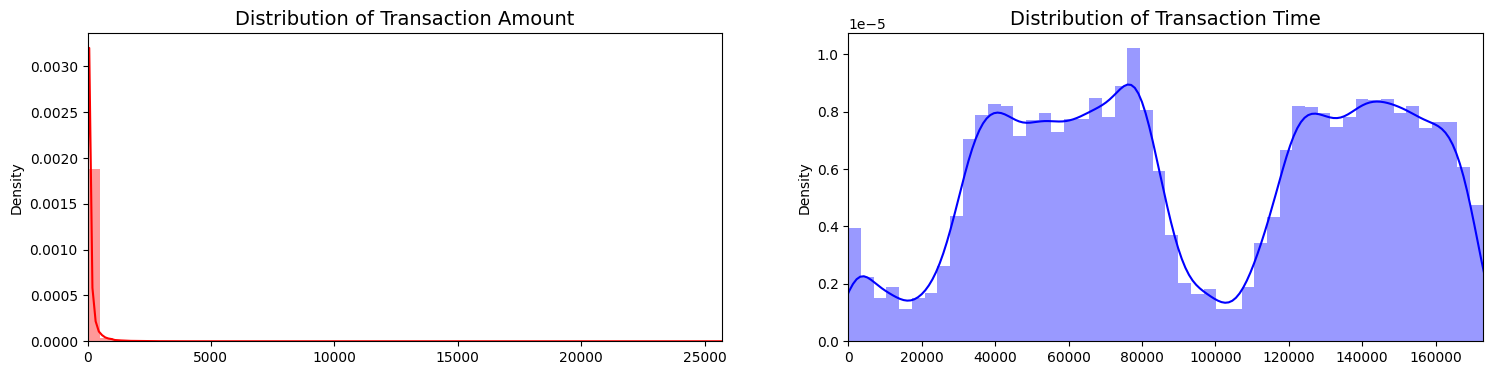

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


As in the above Figure, the transaction time shows that most transactions occur during the day, with a dip in the early hours of the morning. This suggests that the dataset may be skewed towards transactions that occur during the day.

The transaction amount shows that most transactions are small, with a long tail of larger transactions. This is consistent with what we would expect from a credit card dataset, where most transactions are likely to be small purchases. However, the long tail of larger transactions suggests that there may be some fraudulent transactions in the dataset.

## Step 3: Feature Engineering

### Scaling and Distributing

In this step, we will first scale the columns comprised of Time and Amount. Time and Amount should be scaled as the other columns. On the other hand, we need to create a sub-sample of the dataframe to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determine whether a transaction is a fraud or not.

In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non-fraud transactions.

### Why do we create a Sub-Sample?

At the beginning of this notebook, we saw that the original dataframe was heavily imbalanced. Using the original dataframe will cause the following issues:
- **Overfitting**: Our classification models will assume that there are no frauds in most cases. What we want for our model is to be certain when fraud occurs.
- **Wrong Correlations**: Although we don't know what the "V" features stand for, it will be useful to understand how each feature influences the result (Fraud or non-Fraud). By having an imbalanced dataframe we cannot see the true correlations between the class and features.


Here's how to apply RobustScaler to the Amount and Time features in Python:

In [6]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
scaler = RobustScaler()

# Fit the scaler to the Amount and Time columns
scaled_cols = scaler.fit_transform(df[['Amount', 'Time']])

# Replace the original Amount and Time columns with the scaled values
df[['Amount', 'Time']] = scaled_cols

In the code above, we import the RobustScaler class from sklearn.preprocessing, and create an instance of it. We then fit the scaler to the Amount and Time columns using the `fit_transform()` method. Finally, we replace the original Amount and Time columns in the DataFrame with the scaled values.

The RobustScaler scales the data based on the median and interquartile range (IQR) instead of the mean and standard deviation, which makes it more robust to outliers. This can be particularly useful in the case of the Amount column, which has a wide range of values and may contain outliers. Scaling the Time column is also a good practice as it brings the range of values to a similar range as Amount and other columns that will be used for the training process.

## Step 4: Data Sampling

Before proceeding with the Random UnderSampling technique, we must separate the original dataframe. Why? for testing purposes, remember, although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set, not the testing set created by either technique. The main goal is to fit the model either with the dataframes that were undersampled or oversampled (for our models to detect the patterns) and test it on the original testing set.  Heres’ sample code to do that:

In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

# Here we use Stratified K-Fold for splitting data
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))


Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


### Random Under-Sampling

In this step, we will implement **Random Under Sampling** which consists of removing data to have a more balanced dataset and thus avoiding our models from overfitting.

Firstly, we have to do is determine how imbalanced our class is (use `value_counts()` on the class column to determine the amount for each label). Once we determine how many instances are considered fraud transactions (Fraud = “1”), we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio). This will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.
After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio concerning our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy every time we run this script. Here’s code to do that:

In [8]:
# Shuffle the data before creating the subsamples
df = df.sample(frac=1)

# Store Fraud and Non-Fraud in different dataframes
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

# Concatenate them all
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])


# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
252275,0.834608,-3.618136,0.079345,-2.151216,-0.639361,0.095829,1.339038,1.262492,0.551292,0.841970,...,-0.442980,-0.229317,-0.643826,-0.571100,-0.931769,0.187147,0.301503,0.280873,3.393139,0
120837,-0.102374,-5.140723,3.568751,-5.896245,4.164720,-4.091193,-1.989960,-5.472436,2.422821,-2.909735,...,1.131130,0.118022,-0.332704,0.139941,0.324758,-0.180769,0.177810,0.661555,1.088521,1
237929,0.760864,-0.710855,1.056291,-1.454915,-2.050178,3.869278,2.967120,1.282299,0.679127,-1.107978,...,0.036781,0.010893,-0.648075,0.676806,1.284172,0.773288,-0.075959,0.031026,-0.088032,0
57248,-0.433111,-0.887287,1.390002,1.219686,1.661425,1.009228,-0.733908,0.855829,0.000077,-1.275631,...,-0.083734,-0.346930,-0.050619,0.231044,-0.450760,-0.376205,0.034504,0.157775,-0.201495,1
8296,-0.864813,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,-5.902828,...,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,-0.293440,1


**Note**: The main issue with **Random Under-Sampling** is that we run the risk that our classification models will not perform as accurately as we would like to since there is a great deal of information loss (bringing 492 non-fraud transactions from 284,315 non-fraud transactions).

Now you can check the distribution if each target class by using `countplot()` as below:

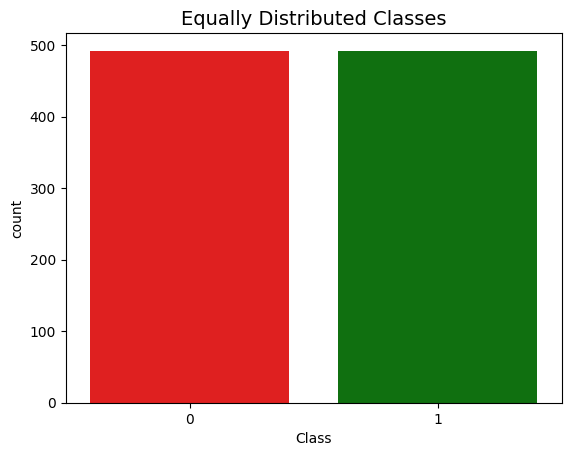

In [9]:
colors = ['red', 'green', 'blue']
sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

### Correlation Between Features

We can use correlation matrices and heatmaps to visualize the correlation between features in the dataset. For original dataset, we can create a correlation matrix of the dataset:

Text(0.5, 1.0, "Imbalanced Correlation Matrix \n (don't use for reference)")

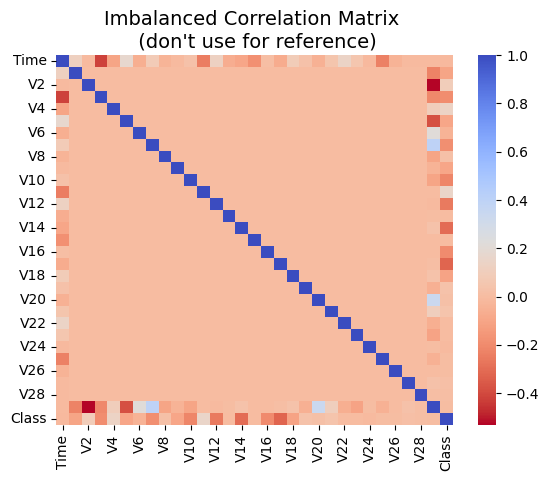

In [10]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

For sampled dataset, we can create a correlation matrix of **new_df** dataframe:

Text(0.5, 1.0, 'SubSample Correlation Matrix \n (use for reference)')

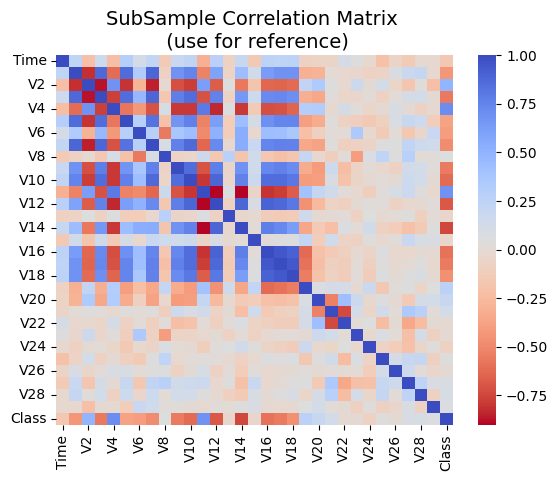

In [11]:
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)

As you can see that, V3, V10, V12, V14, V16, and V17 are negatively correlated with target class because of their low correlation points. Otherwise, V2, V4, V11, and V19 are positively correlated with target one because of high correlation points. 

Here’s sample code to make `boxplot()` to describe the correlations of lower features and target class:

Text(0.5, 1.0, 'V17 vs Class Negative Correlation')

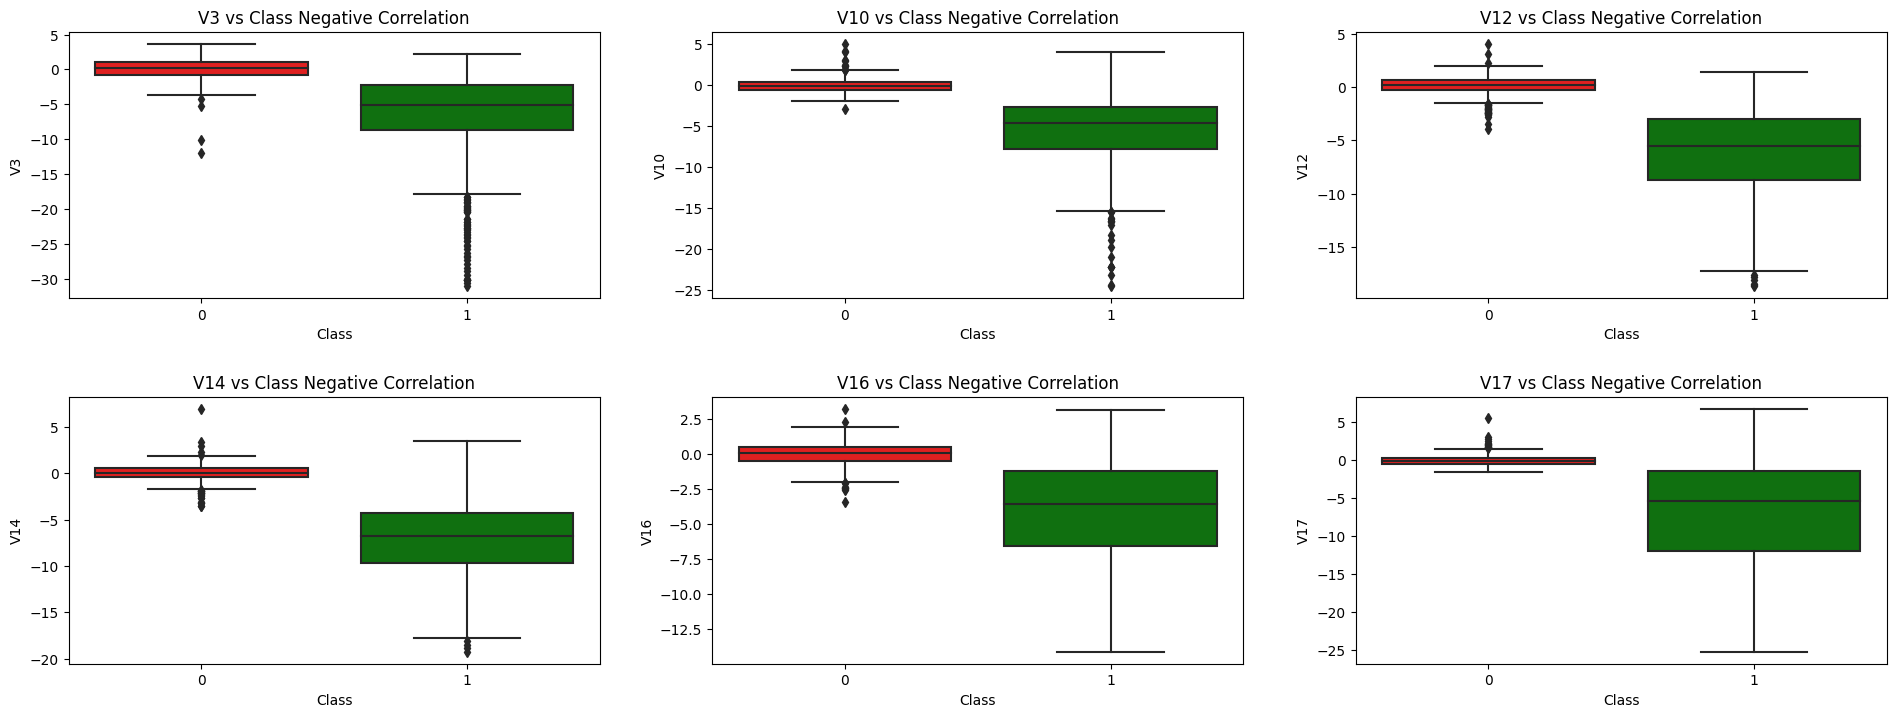

In [12]:
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,8))
f.tight_layout(pad=5.0)

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V3", data=new_df, palette=colors, ax=axes[0,0])
axes[0,0].set_title('V3 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[0,1])
axes[0,1].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[0,2])
axes[0,2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1,0])
axes[1,0].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V16", data=new_df, palette=colors, ax=axes[1,1])
axes[1,1].set_title('V16 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[1,2])
axes[1,2].set_title('V17 vs Class Negative Correlation')


And here’s sample code to make `boxplot()` to describe the correlations of higher features and target class:

Text(0.5, 1.0, 'V19 vs Class Positive Correlation')

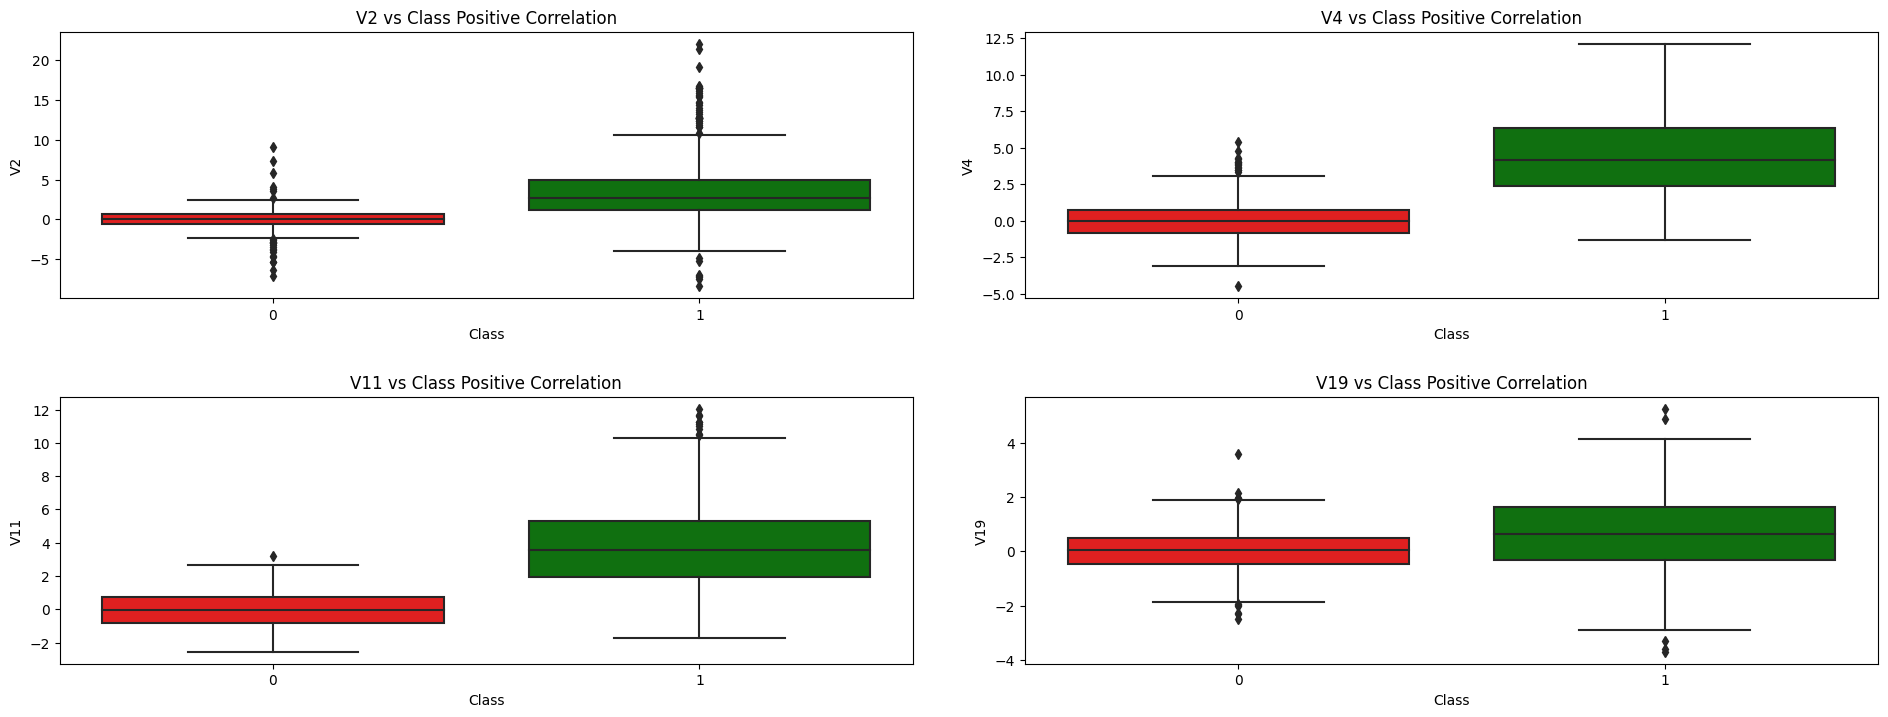

In [13]:
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,8))
f.tight_layout(pad=5.0)

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[0,0])
axes[0,0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[0,1])
axes[0,1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[1,0])
axes[1,0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[1,1])
axes[1,1].set_title('V19 vs Class Positive Correlation')

## Step 5: Anomaly Detection

Our main aim in this step is to remove **extreme outliers** from features that correlate highly with our classes. This will have a positive impact on the accuracy of our models.

### Methods

We try to find outliers by applying IQR method. We calculate this by the 75th and 25th percentile difference. We aim to create a threshold beyond the 75th and 25th percentile that will be deleted if some instances pass this threshold.

Besides easily seeing the 25th and 75th percentiles, it is also easy to see extreme outliers (points beyond the lower and higher extreme) using Boxplot.

### Outlier Removal Tradeoff

We have to be careful about how far we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the fewer outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is, the more outliers it will detect.

The Tradeoff: The lower the threshold, the more outliers it will remove; however, we want to focus more on “extreme outliers” rather than just outliers. Why? Because we might run the risk of information loss which will cause our models to have lower accuracy. You can play with this threshold and see how it affects the accuracy of our classification models.

Firstly, we need to visualize the distribution of each negative related attribute with target class using `displot()` function in seaborn package as follow:

Text(0.5, 1.0, 'V17 Distribution \n (Fraud Transactions)')

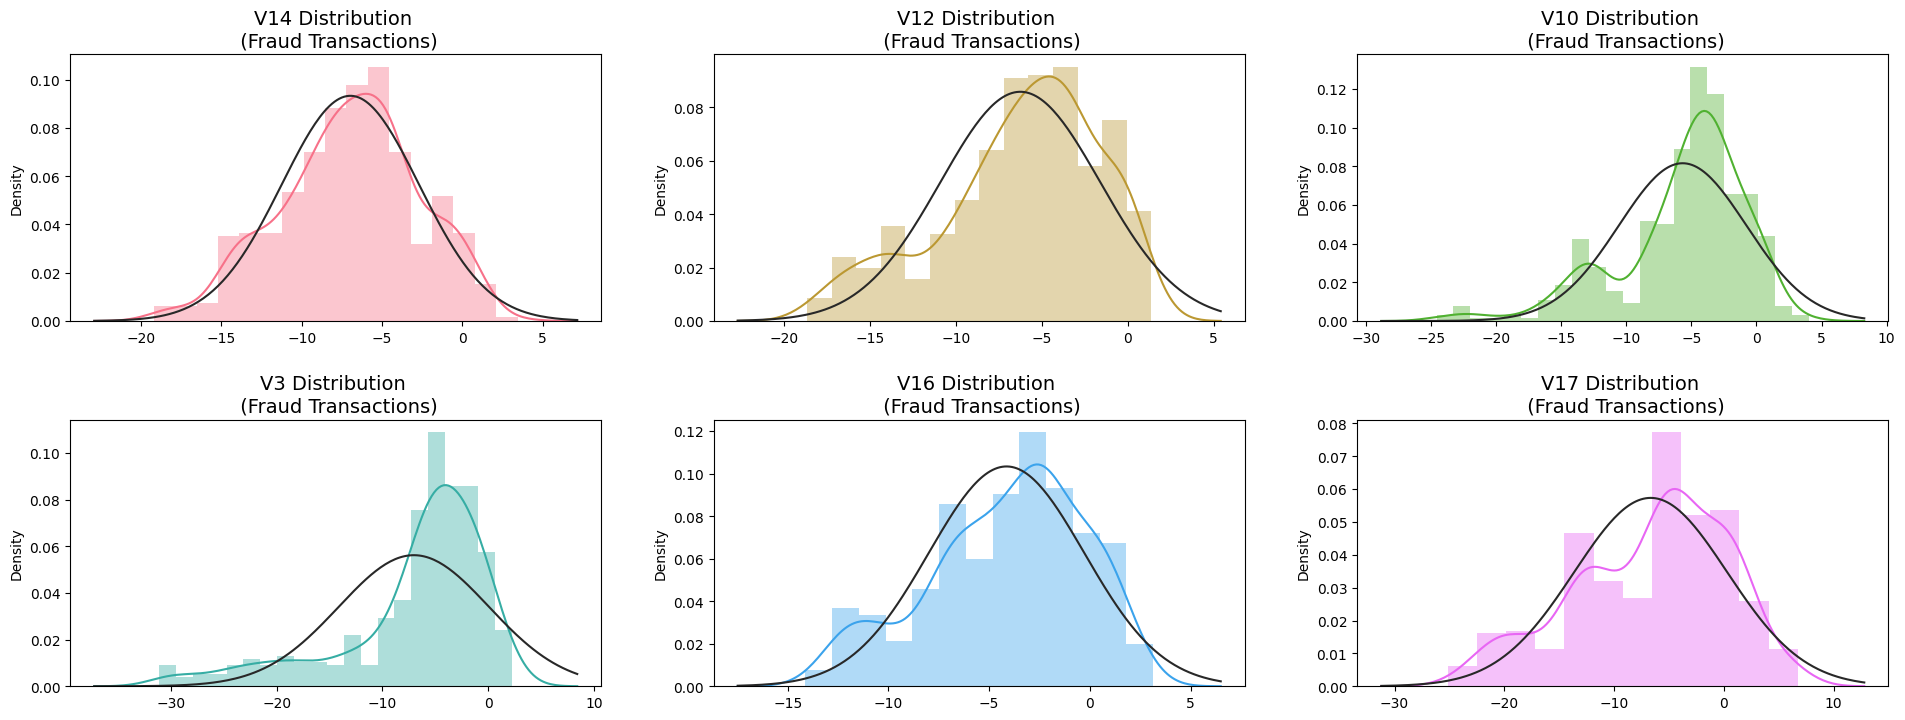

In [14]:
from scipy.stats import norm

f, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))
f.tight_layout(pad=5.0)
palette = iter(sns.husl_palette(6))

fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(fraud_dist,ax=axes[0,0], fit=norm, color=next(palette))
axes[0,0].set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(fraud_dist,ax=axes[0,1], fit=norm, color=next(palette))
axes[0,1].set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(fraud_dist,ax=axes[0,2], fit=norm, color=next(palette))
axes[0,2].set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

fraud_dist = new_df['V3'].loc[new_df['Class'] == 1].values
sns.distplot(fraud_dist,ax=axes[1,0], fit=norm, color=next(palette))
axes[1,0].set_title('V3 Distribution \n (Fraud Transactions)', fontsize=14)

fraud_dist = new_df['V16'].loc[new_df['Class'] == 1].values
sns.distplot(fraud_dist,ax=axes[1,1], fit=norm, color=next(palette))
axes[1,1].set_title('V16 Distribution \n (Fraud Transactions)', fontsize=14)

fraud_dist = new_df['V17'].loc[new_df['Class'] == 1].values
sns.distplot(fraud_dist,ax=axes[1,2], fit=norm, color=next(palette))
axes[1,2].set_title('V17 Distribution \n (Fraud Transactions)', fontsize=14)

Next, we need to have a function to remove outliers as:

In [15]:
def remove_outliers(data_frame, attr='V14'):
    fraud = data_frame[attr].loc[data_frame['Class'] == 1].values
    q25, q75 = np.percentile(fraud, 25), np.percentile(fraud, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    
    iqr = q75 - q25
    print('iqr: {}'.format(iqr))

    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Cut Off: {}'.format(cut_off))
    print('{} Lower: {}'.format(attr, lower))
    print('{} Upper: {}'.format(attr, upper))

    outliers = [x for x in fraud if x < lower or x > upper]
    print('Feature {} Outliers for Fraud Cases: {}'.format(attr, len(outliers)))
    print('Outliers:{}'.format(outliers))

    new_df = data_frame.drop(data_frame[(data_frame[attr] > upper) | (data_frame[attr] < lower)].index)
    return new_df


In this code, we defined a function called, `remove_outliers()`. This function implemented 1st and 3rd quartile and its IQR to calculate the lower and higher threshold to remove outliers for each class in the positive correlation features. And now, we apply this function for each class:

In [16]:
new_df = remove_outliers(new_df, attr='V14')
print(new_df.shape) # Check dataframe’s shape after removing outliers

new_df = remove_outliers(new_df, attr='V12')
print(new_df.shape) # Check dataframe’s shape after removing outliers

new_df = remove_outliers(new_df, attr='V10')
print(new_df.shape) # Check dataframe’s shape after removing outliers

new_df = remove_outliers(new_df, attr='V3')
print(new_df.shape) # Check dataframe’s shape after removing outliers

new_df = remove_outliers(new_df, attr='V16')
print(new_df.shape) # Check dataframe’s shape after removing outliers

new_df = remove_outliers(new_df, attr='V17')
print(new_df.shape) # Check dataframe’s shape after removing outliers

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
Outliers:[-19.2143254902614, -18.0499976898594, -18.4937733551053, -18.8220867423816]
(979, 31)
Quartile 25: -8.67303320439115 | Quartile 75: -2.893030568676315
iqr: 5.780002635714835
Cut Off: 8.670003953572252
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
Feature V12 Outliers for Fraud Cases: 4
Outliers:[-18.4311310279993, -18.5536970096458, -18.6837146333443, -18.0475965708216]
(975, 31)
Quartile 25: -7.466658535821847 | Quartile 75: -2.5118611381562523
iqr: 4.954797397665595
Cut Off: 7.432196096498393
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
Feature V10 Outliers for Fraud Cases: 27
Outliers:[-20.9491915543611, -15.3460988468775, -15.2399619587112, -22.1870885620007, -14.9246547735487, -15.2318333653018, -15.2399619587112, -15.5637913387301, 

## Step 6: Data Splitting

Next, we need to split the data into training and testing sets for machine learning tasks. We can use the `train_test_split()` function from the Scikit-learn library to split the data.

In [17]:
from sklearn.model_selection import train_test_split

# Split List of attributes and Target class
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

This code creates two datasets: `X`, which contains all the new features except for the target variable, and `y`, which contains the target variable. The data is then split into training and testing sets using the `train_test_split()` function, with 80% of the data used for training and 20% used for testing.

## Step 7: Building, Evaluating and Tuning Model

In this step, we will try 4 type of classification models with Hyperparameter tuning, such as GridSearch and decide which one will be more effective for detecting fraud transactions. Here’s an example code:

In [18]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


We realize that Logistic Regression model achieved the highest accuracy. Next we will apply Grid Search to find the best parameters for each model type:

In [19]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Grid’s of Logistic Regression Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

# Grid’s of KNN parameters
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

# Grid’s of SVC parameters
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

# Grid’s DecisionTree parameters
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_


And then re-calculate the performance of each model:

In [20]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross-Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross-Validation Score: ', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross-Validation Score: ', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross-Validation Score: ', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross-Validation Score:  94.01%
Knears Neighbors Cross-Validation Score:  93.15%
Support Vector Classifier Cross-Validation Score:  93.86%
DecisionTree Classifier Cross-Validation Score:  92.01%


Next, we will under-sample the original dataset during cross-validation:

In [21]:
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique X_res, y_res = under_sampler.fit_resample(X, y)
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_RandomUnderSampler, y_RandomUnderSampler = under_sampler.fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_RandomUnderSampler)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(RandomUnderSampler(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 52582  52811  53373 ... 284804 284805 284806] Test: [    0     1     2 ... 56963 56964 56965]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 52582  52811  53373 ... 113933 113934 113935]
Train: [     0      1      2 ... 284804 284805 284806] Test: [109269 109740 110580 ... 170885 170886 170887]
Train: [     0      1      2 ... 284804 284805 284806] Test: [169031 169508 169598 ... 229397 229516 229726]
Train: [     0      1      2 ... 229397 229516 229726] Test: [227840 227841 227842 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


Finally, we can calculate the AUC score of each model:

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)


print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9737410190495024
KNears Neighbors:  0.9259318766066839
Support Vector Classifier:  0.9745237624415003
Decision Tree Classifier:  0.911175103816492


## Step 8-15: Do the Same

You can do the same thing as we did for solving California Housing Price (Step 8-15) for model serialization, deployment, testing and others.